**CRISP**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

import pickle as pk
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving winequality-white (1).csv to winequality-white (1).csv


In [ ]:
df = pd.read_csv("winequality-white (1).csv",sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
x = df.drop(['quality'], axis=1)
y = df['quality']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [ ]:
trainX = trainX.reset_index().drop(['index'], axis=1)
testX = testX.reset_index().drop(['index'], axis=1)
trainY = trainY.reset_index().drop(['index'], axis=1)
testY = testY.reset_index().drop(['index'], axis=1)

In [ ]:
def outliers_z_score(df):
    threshold = 2

    mean = np.mean(df)
    std = np.std(df)
    z_scores = [(y - mean) / std for y in df]
    return np.where(np.abs(z_scores) > threshold)

In [ ]:
my_list = ['float16', 'float32','float32','float16','float32','float32','float32','float64','float32','float32','float32','float32']
num_columns = list(trainX.select_dtypes(include=my_list).columns)
numerical_columns = trainX[num_columns]

In [ ]:
outlier_list = numerical_columns.apply(lambda x: outliers_z_score(x))
outlier_list

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,"[14, 17, 51, 53, 70, 163, 172, 222, 236, 239, ...","[89, 97, 169, 187, 223, 277, 306, 320, 341, 35...","[1, 165, 184, 187, 188, 200, 218, 238, 239, 24...","[0, 11, 12, 19, 21, 66, 107, 113, 230, 235, 30...","[54, 86, 121, 304, 309, 333, 361, 379, 417, 43...","[7, 53, 103, 310, 390, 394, 422, 434, 448, 459...","[3, 7, 11, 31, 47, 57, 136, 196, 208, 222, 362...","[11, 58, 113, 168, 241, 258, 343, 348, 386, 52...","[59, 69, 170, 243, 256, 277, 299, 318, 386, 38...","[24, 41, 49, 62, 91, 122, 160, 191, 198, 215, ...","[41, 58, 70, 102, 104, 237, 276, 277, 379, 421..."


In [ ]:
df_of_outlier = outlier_list.iloc[0]
df_of_outlier = pd.DataFrame(df_of_outlier)
df_of_outlier.columns = ['Rows_to_exclude']

In [ ]:
outlier_list_final = df_of_outlier['Rows_to_exclude'].to_numpy()

In [ ]:
outlier_list_final = np.concatenate( outlier_list_final, axis=0 )

In [ ]:
outlier_list_final_unique = set(outlier_list_final)

In [ ]:
filter_rows_to_exclude = trainX.index.isin(outlier_list_final_unique)
trainX_wo_outlier = trainX[~filter_rows_to_exclude]

In [ ]:
trainX_wo_outlier = trainX_wo_outlier.reset_index().drop(['index'], axis=1)

In [ ]:
print('Length of original dataframe: ' + str(len(trainX)))

print('Length of new dataframe without outliers: ' + str(len(trainX_wo_outlier)))
print('----------------------------------------------------------------------------------------------------')
print('Difference between new and old dataframe: ' + str(len(trainX) - len(trainX_wo_outlier)))
print('----------------------------------------------------------------------------------------------------')
print('Length of unique outlier list: ' + str(len(outlier_list_final_unique)))


Length of original dataframe: 3918
Length of new dataframe without outliers: 2678
----------------------------------------------------------------------------------------------------
Difference between new and old dataframe: 1240
----------------------------------------------------------------------------------------------------
Length of unique outlier list: 1240


In [ ]:
trainX_wo_MV = trainX_wo_outlier

In [ ]:
obj_col = ['object']
object_columns = list(trainX_wo_MV.select_dtypes(include=obj_col).columns)
trainX_categorical = trainX_wo_MV[object_columns]

print()
print('There are ' + str(trainX_categorical.shape[1]) + ' categorical columns within dataframe(trainX).')


There are 0 categorical columns within dataframe(trainX).


In [ ]:
trainX_encoded = trainX_wo_MV

trainX_encoded.to_csv('trainX_encoded.csv', index=False)

In [ ]:
col_names = trainX_encoded.columns
features = trainX_encoded[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

trainX_scaled = pd.DataFrame(features, columns = col_names)
trainX_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.290617,-0.302006,-0.151363,-1.041762,0.421379,-0.089606,-0.780849,-0.254621,0.269896,0.797123,0.185472
1,0.268095,0.768329,-0.619301,0.280771,-1.510406,0.191136,-0.360253,-0.771052,-0.286273,1.342384,1.759657
2,-0.170130,1.035913,1.252449,-0.973355,-0.158157,-0.370347,-0.570551,-1.348690,0.349349,-0.402450,1.759657
3,1.436692,2.240040,1.954356,1.626107,-0.930871,0.191136,0.586090,0.701733,-0.365726,-1.383920,0.622745
4,-0.316204,-0.034422,-0.385332,-1.018960,-0.351335,-1.493314,-1.806054,-0.828433,-1.080801,0.142810,0.272927


In [ ]:
filter_rows_to_exclude = trainY.index.isin(outlier_list_final_unique)
trainY_wo_outlier = trainY[~filter_rows_to_exclude]

trainY_wo_outlier = trainY_wo_outlier.reset_index().drop(['index'], axis=1)

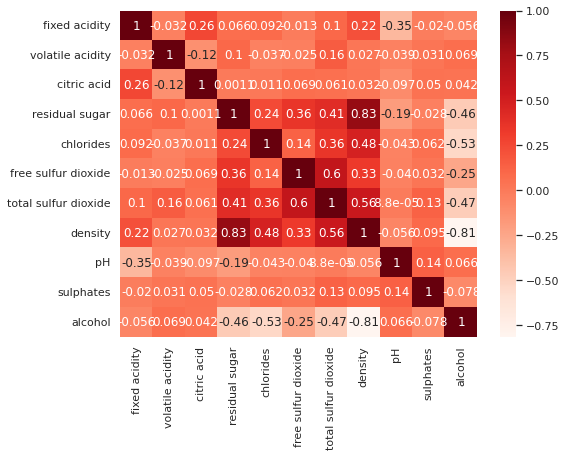

In [ ]:
plt.figure(figsize=(8,6))
cor = trainX_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
correlated_features = set()
correlation_matrix = trainX_scaled.corr()

threshold = 0.90

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
            
len(correlated_features)

0

In [ ]:
trainX_final = trainX_scaled
trainY_final = trainY_wo_outlier

In [ ]:
lm = LinearRegression()
lm.fit(trainX_final, trainY_final)

print('R² Score of fitted lm-model: ' + str(lm.score(trainX_final, trainY_final)))

pk.dump(lm, open('lm_model.pkl', 'wb'))

R² Score of fitted lm-model: 0.25132064556535216


In [ ]:
testX_wo_MV = testX
testX_encoded = testX_wo_MV


testX_encoded.to_csv('testX_encoded.csv', index=False)

In [ ]:
pk.dump(scaler, open('StandardScaler.pkl', 'wb'))
scaler_reload = pk.load(open("StandardScaler.pkl",'rb'))

In [ ]:
col_names = testX_encoded.columns
features = testX_encoded[col_names]

features = scaler_reload.transform(features.values)
testX_scaled = pd.DataFrame(features, columns = col_names)

testX_final = testX_scaled
testY_final = testY

testX_final.to_csv('testX_final.csv', index=False)
testY_final.to_csv('testY_final.csv', index=False)

In [ ]:
lm_reload = pk.load(open("lm_model.pkl",'rb'))
y_pred = lm_reload.predict(testX_final)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testY_final, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testY_final, y_pred))  
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(testY_final, y_pred)))

Mean Absolute Error: 0.5921093744835461
Mean Squared Error: 0.5786860117896091
Root Mean Squared Error: 0.7607141459113331


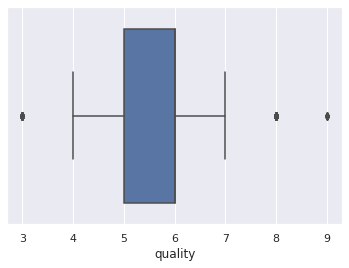

In [ ]:
sns.boxplot(x='quality', data=df)

In [ ]:
trainX_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.290617,-0.302006,-0.151363,-1.041762,0.421379,-0.089606,-0.780849,-0.254621,0.269896,0.797123,0.185472
1,0.268095,0.768329,-0.619301,0.280771,-1.510406,0.191136,-0.360253,-0.771052,-0.286273,1.342384,1.759657
2,-0.170130,1.035913,1.252449,-0.973355,-0.158157,-0.370347,-0.570551,-1.348690,0.349349,-0.402450,1.759657
3,1.436692,2.240040,1.954356,1.626107,-0.930871,0.191136,0.586090,0.701733,-0.365726,-1.383920,0.622745
4,-0.316204,-0.034422,-0.385332,-1.018960,-0.351335,-1.493314,-1.806054,-0.828433,-1.080801,0.142810,0.272927
...,...,...,...,...,...,...,...,...,...,...,...
2673,-0.608354,-0.302006,-0.736285,0.531597,1.097504,0.892990,1.216985,0.655828,-0.524632,0.251862,-0.951440
2674,2.020991,-1.238549,-0.034379,-0.996157,0.711147,-1.212573,-0.912286,0.127921,-0.365726,1.124280,-0.951440
2675,-0.462279,0.099370,-0.736285,0.531597,-0.061568,-0.931831,-0.071092,0.938909,1.938405,1.778593,-0.689076
2676,-0.900503,0.366953,-1.087238,1.489293,0.517968,-0.089606,1.716443,0.938909,-0.604085,0.906175,-0.601621


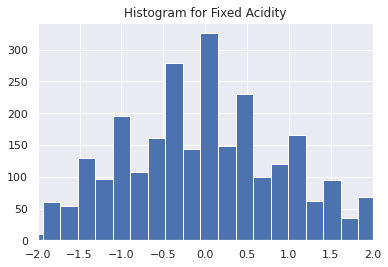

In [ ]:
plt.hist(trainX_scaled['fixed acidity'], bins='auto')
plt.title("Histogram for Fixed Acidity")
plt.xlim(xmin=-2, xmax = 2)
plt.show()

In [ ]:
mms = MinMaxScaler()
mms.fit(trainX_scaled)
data_transformed = mms.transform(trainX_scaled)

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

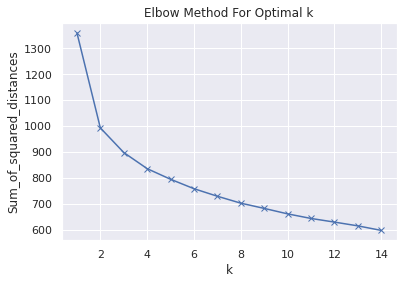

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
km = KMeans(n_clusters=4, random_state=1)
km.fit(trainX_scaled)

KMeans(n_clusters=4, random_state=1)

In [ ]:
predict=km.predict(trainX_scaled)
trainX_scaled['clusters'] = pd.Series(predict, index=trainX_scaled.index)

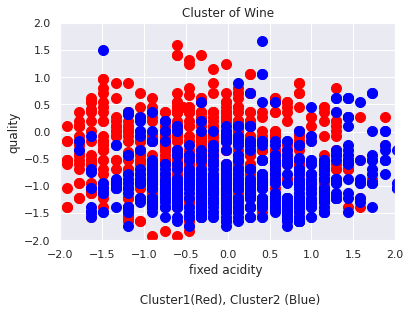

In [ ]:
df_sub = trainX_scaled[['fixed acidity', 'alcohol']].values

plt.scatter(df_sub[predict==0, 0], df_sub[predict==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(df_sub[predict==1, 0], df_sub[predict==1, 1], s=100, c='blue', label ='Cluster 2')

plt.title('Cluster of Wine')
plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.xlabel('fixed acidity \n\n Cluster1(Red), Cluster2 (Blue)')
plt.ylabel('quality')
plt.show()

In [ ]:
wine_SimplReg = trainX_scaled[['fixed acidity', 'alcohol']]
wine_SimplReg.head()

,fixed acidity,alcohol
0,1.290617,0.185472
1,0.268095,1.759657
2,-0.170130,1.759657
3,1.436692,0.622745
4,-0.316204,0.272927


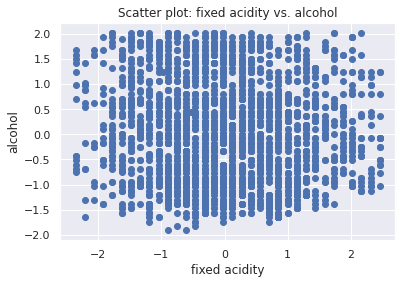

In [ ]:
x = wine_SimplReg['fixed acidity']
y = wine_SimplReg['alcohol']

plt.scatter(x, y)
plt.title('Scatter plot: fixed acidity vs. alcohol')
plt.xlabel('fixed acidity')
plt.ylabel('alcohol')
plt.show()